In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 차트 -가 표시 안되는 문제 해결
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# warnings 무시
import warnings
warnings.filterwarnings(action='ignore') 

## 1. 성별 분포 시각화
- 데이터 빈도 (histogram, box)
- 데이터 전처리
- 변수 검토
- 변수간 관계 분석 및 시각화

In [2]:
xls = pd.ExcelFile('./data/koweps_visualization.xlsx')

In [53]:
koweps_df = xls.parse(xls.sheet_names[0])

In [54]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


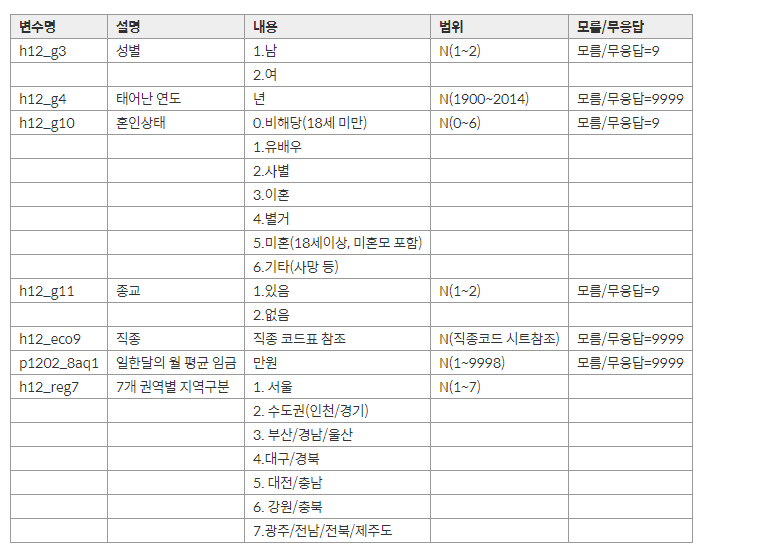

In [55]:
from IPython.display import Image
Image('./images/koweps_img.png')

In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [57]:
# 1. 해당 데이터 프레임에서 제공한 컬럼들만 추출하여 사용하고자하는 컬럼들만 rename
want_columns_df = data_df[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
want_columns_df.columns = ['성별','태어난 연도','혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']
want_columns_df.head(10)

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


In [58]:
# 데이터 분석
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화

In [59]:
# 성별 추출
gender_filter_df = want_columns_df.filter(['성별'])
gender_filter_df.head()

,성별
0,2
1,2
2,1
3,1
4,2


In [60]:
# 성별값을 남, 여로 변경
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자')
gender_filter_df.head()

,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


In [61]:
# 결측값 확인
gender_filter_df.isna().sum()

성별     0
성별2    0
dtype: int64

In [62]:
# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
gender_count

여자    8440
남자    6982
Name: 성별2, dtype: int64

In [63]:
# 시리즈를 데이터 프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.head()

,성별2
여자,8440
남자,6982


In [64]:
gender_count_df.rename(columns = {'성별2' : '명'}, inplace=True)
gender_count_df

,명
여자,8440
남자,6982


In [65]:
# 비율순으로 정렬
gender_count_df.sort_values('명', inplace=True)
gender_count_df

,명
남자,6982
여자,8440


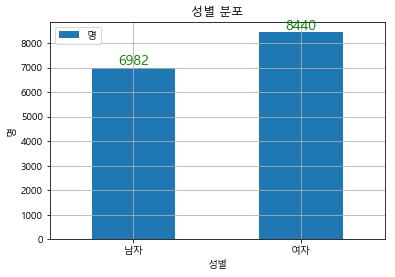

In [66]:
gender_count_df.plot.bar(rot=0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list( gender_count_df['명'])) :
    txt = '%d' % value
    plt.text(idx, value, txt,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=14,
             color='green')
    
plt.show()

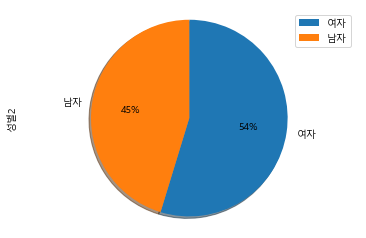

In [67]:
gender_count.plot.pie(autopct='%d%%',
                          startangle = 253,
                          legend=True,
                          shadow=True,
                          labels = gender_count.index)
plt.axis('equal')
plt.show()

In [68]:
gender_count

여자    8440
남자    6982
Name: 성별2, dtype: int64

## 2. 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변환
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(성별로 그룹화하여 그룹별 평균)
- 데이터 시각화

In [69]:
# 성별과 월급 데이터만 추출
gender_salary_df = data_df[['h12_g3', 'p1202_8aq1']]
gender_salary_df.columns = ['성별', '일한달의 월 평균 임금']
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [70]:
# 성별값을 남, 여로 변경
gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1, '남자', '여자')
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [71]:
# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
print( gender_salary_df.isna().sum() )
gender_salary_df.dropna(inplace=True)
print( gender_salary_df.isna().sum() )
print('*' * 50)
gender_salary_df.head(10)

성별                  0
일한달의 월 평균 임금    10915
dtype: int64
성별              0
일한달의 월 평균 임금    0
dtype: int64
**************************************************


,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
27,여자,100.0
29,여자,200.0
30,여자,130.0
31,여자,150.0
36,남자,250.0


In [72]:
# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
# 결측값 확인
gender_salary_df['일한달의 월 평균 임금'] = np.where(
    ((gender_salary_df['일한달의 월 평균 임금'] < 1) | ( gender_salary_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan , gender_salary_df['일한달의 월 평균 임금'] )
gender_salary_df.head()

,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0


In [73]:
print( gender_salary_df.isna().sum() )
gender_salary_df.dropna(inplace=True)
print( "*" * 50 )
print( gender_salary_df.isna().sum() )

성별               0
일한달의 월 평균 임금    14
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


In [74]:
# 데이터 분석(성별로 그룹화하여 그룹별 평균)
gender_salary_mean_df = gender_salary_df.groupby('성별').mean()
gender_salary_mean_df.head()

,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


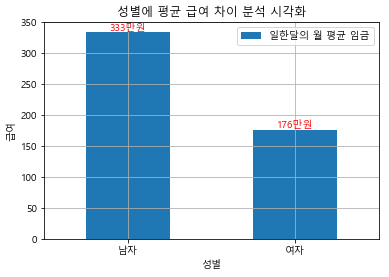

In [75]:
# 성별에 평균 급여 차이 분석 시각화
gender_salary_mean_df.plot.bar(rot=0)
plt.grid()
plt.title('성별에 평균 급여 차이 분석 시각화')
plt.xlabel('성별')
plt.ylabel('급여')


for idx, value in enumerate(list( gender_salary_mean_df['일한달의 월 평균 임금'] )) :
    txt = '%d만원' % value
    plt.text(idx, value, txt , 
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=10,
            color='red')

plt.show()

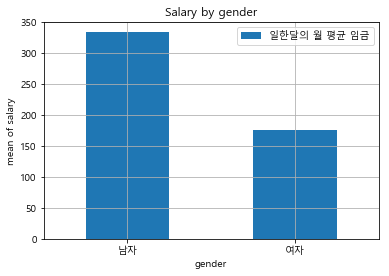

In [76]:
# 데이터 시각화
gender_salary_mean_df.plot.bar(rot=0)
plt.title('Salary by gender')
plt.xlabel('gender')
plt.ylabel('mean of salary')
plt.grid()
plt.show()

## 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 연도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여 평균)
- 데이터 시각화

In [77]:
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [78]:
year_salary_df =want_columns_df.filter(['태어난 연도', '일한달의 월 평균 임금'])
year_salary_df.head()

,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [79]:
# 나이를 계산하여 파생변수 추가
now_year = dt.datetime.now().year
# now_year
year_salary_df['나이'] = now_year - year_salary_df['태어난 연도'] + 1
year_salary_df.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98


In [80]:
# 데이터 정제(결측값 확인)
year_salary_df.isna().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64

In [81]:
# 데이터 정제(결측값 처리)
year_salary_df.dropna(inplace=True)
year_salary_df.isna().sum()

태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64

In [82]:
# 이상치 정제
# 코드표에서 제시한 범위를 벗어난 값(1보다 작거나 9998보다 큰 값)은 이상치 이므로 결측치로 변경해야 한다.

year_salary_df['일한달의 월 평균 임금'] = np.where(
    ((year_salary_df['일한달의 월 평균 임금'] < 1) | (year_salary_df['일한달의 월 평균 임금'] > 9998)), 
    np.nan, 
    year_salary_df['일한달의 월 평균 임금'])
year_salary_df.isna().sum()  # 결측치 확인

태어난 연도           0
일한달의 월 평균 임금    14
나이               0
dtype: int64

In [83]:
year_salary_df.dropna(inplace=True)
year_salary_df.isna().sum()

태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64

In [84]:
# 데이터 분석
year_salary_df = year_salary_df.filter(['나이','일한달의 월 평균 임금']).groupby('나이').mean()
year_salary_df.head()

,일한달의 월 평균 임금
나이,
23,89.333333
24,136.720000
25,140.807692
26,138.000000
27,145.652000


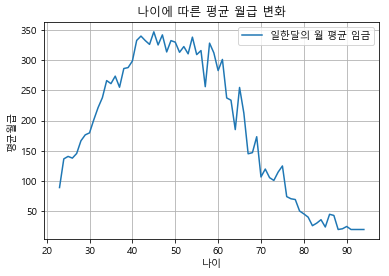

In [85]:
# 시각화
year_salary_df.plot()
plt.rcParams['figure.figsize'] = (10,5)
plt.title('나이에 따른 평균 월급 변화')
plt.grid()
plt.xlabel('나이')
plt.ylabel('평균월급')
plt.show()

## 연령대에 따른 분포

In [86]:
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [87]:
year_df = want_columns_df.filter(['태어난 연도'])
year_df.head()

,태어난 연도
0,1936
1,1945
2,1948
3,1942
4,1923


In [88]:
# 나이를 계산 파생변수 추가
import datetime as dt
year_df['나이'] = dt.datetime.now().year - year_df['태어난 연도'] + 1
year_df.head()

,태어난 연도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98


In [89]:
# 연령대를 분석하기 위한 파생변수 추가
year_df['연령대'] = (year_df['나이'] // 10) * 10
year_df.head()

,태어난 연도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90


In [90]:
# 결측값 확인 및 절차 및 정제
year_df.isna().sum()

태어난 연도    0
나이        0
연령대       0
dtype: int64

In [91]:
# 연령대에 대한 빈도수 확인
# age_gen_df = year_df.filter(['나이', '연령대']).groupby('연령대').count()
# age_gen_df

# DataFrame -> value_counts() 불가능
# Series -> value_counts() 가능
# type(year_df['연령대'].value_counts())
# type(year_df.filter(['연령대']).value_counts())

# 같은 결과가 나오는 다른 방법
age_gen_df2 = pd.DataFrame( year_df['연령대'].value_counts() )
age_gen_df2.sort_index(inplace=True)
age_gen_df2

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


In [92]:
# 인덱스를 의미 있는 이름으로 수정
reIndex = {}
for idx in list(age_gen_df2.index) :
    reIndex[idx] = '%d대' % idx
    
# reindex
age_gen_df2.rename(index=reIndex, inplace=True)
age_gen_df2

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


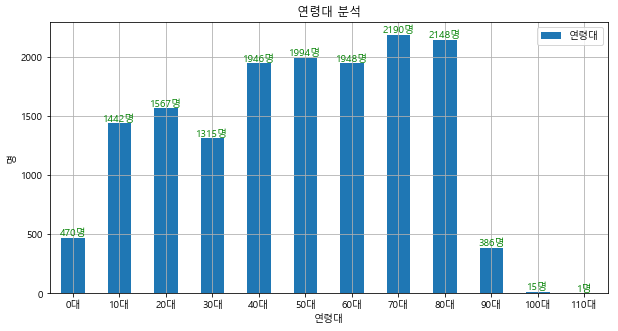

In [93]:
# 시각화 bar()
age_gen_df2.plot.bar(rot=0)
plt.grid()
plt.title('연령대 분석')
plt.xlabel('연령대')
plt.ylabel('명')

for idx, value in enumerate(list( age_gen_df2['연령대'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10,
             color='green')
    
plt.show()

## 연령대별 평균 급여 변화

In [94]:
year_salary_df = want_columns_df.filter(['태어난 연도','일한달의 월 평균 임금'])
year_salary_df.head()

,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [95]:
# 연령대를 분석하기 위한 파생변수 추가
year_salary_df['연령대'] = \
    (dt.datetime.now().year - year_salary_df['태어난 연도'] + 1) // 10 * 10
year_salary_df.head()

,태어난 연도,일한달의 월 평균 임금,연령대
0,1936,NaN,80
1,1945,NaN,70
2,1948,NaN,70
3,1942,108.9,70
4,1923,NaN,90


In [96]:
year_salary_df.isna().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
연령대                 0
dtype: int64

In [97]:
# 데이터 정제(결측값 처리)
year_salary_df.dropna(inplace=True)
year_salary_df.isna().sum()

태어난 연도          0
일한달의 월 평균 임금    0
연령대             0
dtype: int64

In [98]:
# 이상치 정제
# 코드표에서 제시한 범위를 벗어난 값(1보다 작거나 9998보다 큰 값)은 이상치 이므로 결측치로 변경해야 한다.

year_salary_df['일한달의 월 평균 임금'] = np.where(
    ((year_salary_df['일한달의 월 평균 임금'] < 1) | (year_salary_df['일한달의 월 평균 임금'] > 9998)), 
    np.nan, 
    year_salary_df['일한달의 월 평균 임금'])
year_salary_df.isna().sum()  # 결측치 확인

태어난 연도           0
일한달의 월 평균 임금    14
연령대              0
dtype: int64

In [99]:
year_salary_df.dropna(inplace=True)
year_salary_df.isna().sum()

태어난 연도          0
일한달의 월 평균 임금    0
연령대             0
dtype: int64

In [100]:
year_salary_mean_df = year_salary_df.filter(['연령대','일한달의 월 평균 임금']).groupby('연령대').mean()
year_salary_mean_df.head()

,일한달의 월 평균 임금
연령대,
20,154.890476
30,248.058273
40,329.490912
50,314.754431
60,226.846086


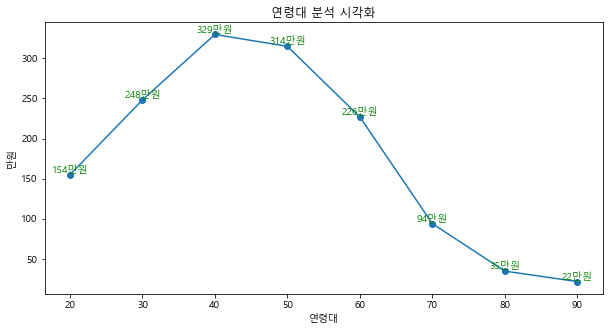

In [101]:
plt.plot(year_salary_mean_df.index,
                        year_salary_mean_df['일한달의 월 평균 임금'],
                        marker='o')
plt.grid
plt.title('연령대 분석 시각화')
plt.xlabel('연령대')
plt.ylabel('만원')

for idx, value in enumerate(list( year_salary_mean_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    x = year_salary_mean_df.index[idx]
    plt.text(x, value, txt,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10,
             color='green')

plt.show()

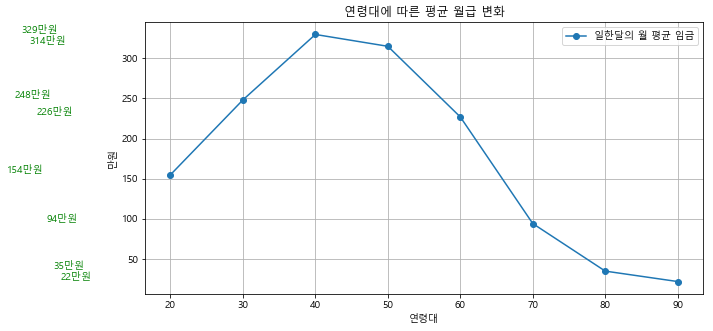

In [102]:
year_salary_mean_df.plot(marker='o')
plt.grid()
plt.rcParams['figure.figsize'] = (10,5)
plt.title('연령대에 따른 평균 월급 변화')
plt.xlabel('연령대')
plt.ylabel('만원')

for idx, value in enumerate(list( year_salary_mean_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontsize=10,
             color='green')
    
plt.show()

## 성별과 연령대 분포

In [103]:
# 성별과 연령대 분포 분석하고 시각화
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [104]:
gender_year_dist_df = want_columns_df.filter(['성별', '태어난 연도'])
gender_year_dist_df.head()

,성별,태어난 연도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923


In [105]:
# 성별 값을 남자, 여자

gender_year_dist_df['성별'] = np.where(gender_year_dist_df['성별'] == 1, '남자', '여자')
gender_year_dist_df.head()

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923


In [106]:
# 연령대 계산하여 파생변수 추가
gender_year_dist_df['연령대'] = \
    (dt.datetime.now().year - gender_year_dist_df['태어난 연도'] + 1) // 10 * 10
gender_year_dist_df.head()

,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90


In [107]:
# 데이터 정제
# 이상치 확인 및 결측값 확인 후 제거
gender_year_dist_df.isna().sum()

성별        0
태어난 연도    0
연령대       0
dtype: int64

In [108]:
# 데이터 분석
# 성별과 연령대 별로 빈도수 계산
gender_gen_dist_df = gender_year_dist_df.groupby(['성별','연령대'], as_index=False).count()
display(gender_year_dist_df.head())
gender_gen_dist_df = gender_gen_dist_df.rename(columns={'태어난 연도' : '명'})
print('*'*77)
display(gender_year_dist_df.head())

,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90


*****************************************************************************


,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90


In [109]:
# 성별이 컬럼, 연령대가 인덱스로 사용되고 인원수가 데이터 배치되도록 피봇 구성
# pivot(index, column , value)
gender_gen_dist_pivot = gender_gen_dist_df.pivot('연령대','성별','명')
display(gender_gen_dist_pivot)
# 필요에 따라 인덱스 이름을 변경
age_index_rename = {}
for idx in list(gender_gen_dist_pivot.index) :
    age_index_rename[idx] = '%d대' % idx
display(age_index_rename)
gender_gen_dist_pivot.rename(index=age_index_rename, inplace=True)
display(gender_gen_dist_pivot)

성별,남자,여자
연령대,,
0,239.0,231.0
10,732.0,710.0
20,710.0,857.0
30,636.0,679.0
40,981.0,965.0
50,1004.0,990.0
60,888.0,1060.0
70,834.0,1356.0
80,820.0,1328.0


{0: '0대',
 10: '10대',
 20: '20대',
 30: '30대',
 40: '40대',
 50: '50대',
 60: '60대',
 70: '70대',
 80: '80대',
 90: '90대',
 100: '100대',
 110: '110대'}

성별,남자,여자
연령대,,
0대,239.0,231.0
10대,732.0,710.0
20대,710.0,857.0
30대,636.0,679.0
40대,981.0,965.0
50대,1004.0,990.0
60대,888.0,1060.0
70대,834.0,1356.0
80대,820.0,1328.0


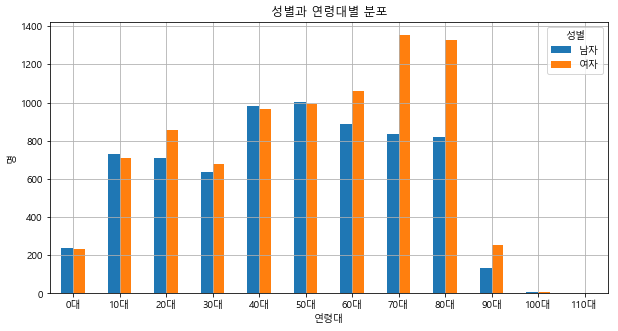

In [110]:
# 시각화
gender_gen_dist_pivot.plot.bar(rot=0)
plt.title('성별과 연령대별 분포')
plt.grid()
plt.xlabel('연령대')
plt.ylabel('명')

plt.show()

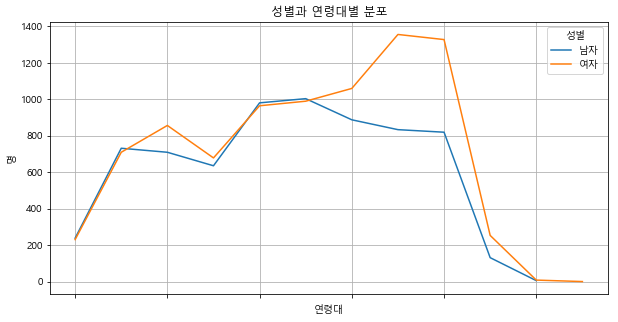

In [111]:
# 시각화
gender_gen_dist_pivot.plot(rot=0)
plt.title('성별과 연령대별 분포')
plt.grid()
plt.xlabel('연령대')
plt.ylabel('명')

plt.show()

## 지역별 연령층 분포와 연령층별 지역비율

In [112]:
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [113]:
region_age_df = want_columns_df.filter(['태어난 연도', '7개 권역별 지역구분'])
region_age_df.head()

,태어난 연도,7개 권역별 지역구분
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1


In [114]:
region_age_df['나이'] = dt.datetime.now().year - region_age_df['태어난 연도'] + 1
region_age_df.head()

,태어난 연도,7개 권역별 지역구분,나이
0,1936,1,85
1,1945,1,76
2,1948,1,73
3,1942,1,79
4,1923,1,98


In [115]:
# 지역코드와 매칭되는 데이터프레임을 만들어서 병합
region_code_df = pd.DataFrame({
    '지역코드' : list(range(1,8)),
    '지역명'   : ['서울','수도권(인천/경기)','부산/경남/울산','대구/경북','대전/충남','강원/충북','광주/전남/전북/제주도']
})
display(region_code_df)
print('*'*50)
region_age_code_df = pd.merge(region_age_df,
                              region_code_df,
                              left_on = '7개 권역별 지역구분',
                              right_on = '지역코드',
                              how='outer')
display( region_age_code_df.info())
display( region_age_code_df.head())
region_age_code_df.drop('7개 권역별 지역구분', axis=1, inplace=True)
print('*'*50)
display( region_age_code_df.head())

,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15422 entries, 0 to 15421
Data columns (total 5 columns):
태어난 연도         15422 non-null int64
7개 권역별 지역구분    15422 non-null int64
나이             15422 non-null int64
지역코드           15422 non-null int64
지역명            15422 non-null object
dtypes: int64(4), object(1)
memory usage: 722.9+ KB


None

,태어난 연도,7개 권역별 지역구분,나이,지역코드,지역명
0,1936,1,85,1,서울
1,1945,1,76,1,서울
2,1948,1,73,1,서울
3,1942,1,79,1,서울
4,1923,1,98,1,서울


**************************************************


,태어난 연도,나이,지역코드,지역명
0,1936,85,1,서울
1,1945,76,1,서울
2,1948,73,1,서울
3,1942,79,1,서울
4,1923,98,1,서울


In [116]:
# 데이터 분석
# 연령층은 나이 구간을 나이 < 30 : 청년층, 나이 < 60 : 중년층 그렇지 않으면 노년층
# 연령층 파생컬럼을 추가하여 최종 데이터 프레임 생성
def age(x) :
    c = ''
    if x < 30 :
        c = '청년층'
    elif x < 60 :
        c = '중년층'
    else :
        c = '노년층'
    return c
region_age_code_df['연령층'] = region_age_code_df['나이'].apply(lambda x : age(x))
display( region_age_code_df.head() )

,태어난 연도,나이,지역코드,지역명,연령층
0,1936,85,1,서울,노년층
1,1945,76,1,서울,노년층
2,1948,73,1,서울,노년층
3,1942,79,1,서울,노년층
4,1923,98,1,서울,노년층


In [117]:
# case 연구 2)
# np.select(list, list, default) -> 1차원, series
condition01 = [ (region_age_code_df['나이'] < 30),
                (region_age_code_df['나이'] < 60),
                (region_age_code_df['나이'] >= 60)]
condition02 = ['청년층','중년층','노년층']
region_age_code_df['연령층'] = np.select(condition01, condition02)
display(region_age_code_df.head())

,태어난 연도,나이,지역코드,지역명,연령층
0,1936,85,1,서울,노년층
1,1945,76,1,서울,노년층
2,1948,73,1,서울,노년층
3,1942,79,1,서울,노년층
4,1923,98,1,서울,노년층


In [118]:
# 지역과연령층에 대한 빈도분포를 확인하시고
region_age_group_df = region_age_code_df.filter(['나이','지역명','연령층']).groupby(['지역명','연령층'], as_index=False).count()
display( region_age_group_df.head() )

region_age_group_df.rename(columns={'나이':'인원'}, inplace=True)
display( region_age_group_df.head())

,지역명,연령층,나이
0,강원/충북,노년층,567
1,강원/충북,중년층,361
2,강원/충북,청년층,252
3,광주/전남/전북/제주도,노년층,1283
4,광주/전남/전북/제주도,중년층,867


,지역명,연령층,인원
0,강원/충북,노년층,567
1,강원/충북,중년층,361
2,강원/충북,청년층,252
3,광주/전남/전북/제주도,노년층,1283
4,광주/전남/전북/제주도,중년층,867


In [119]:
# 분석결과를 pivot 구성
# 지역을 인덱스 연령층을 컬럼으로 나이를 구하기
# pivot(index, columns, value) # 피벗은 하나의 벨류 !
# pivot_table(data, values, index, columns,aggfunc='mean')

region_age_group_pivot = region_age_group_df.pivot('지역명','연령층','인원')
region_age_group_pivot.head()

연령층,노년층,중년층,청년층
지역명,,,
강원/충북,567,361,252
광주/전남/전북/제주도,1283,867,599
대구/경북,973,537,364
대전/충남,591,443,321
부산/경남/울산,1189,844,531


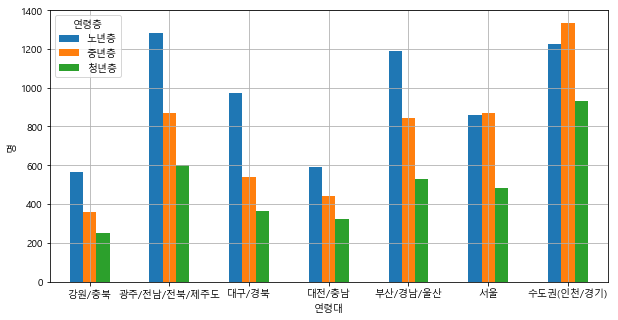

In [120]:
# 데이터 시각화
region_age_group_pivot.plot.bar(rot=0)
plt.grid()
plt.title('')
plt.xlabel('연령대')
plt.ylabel('명')

plt.show()

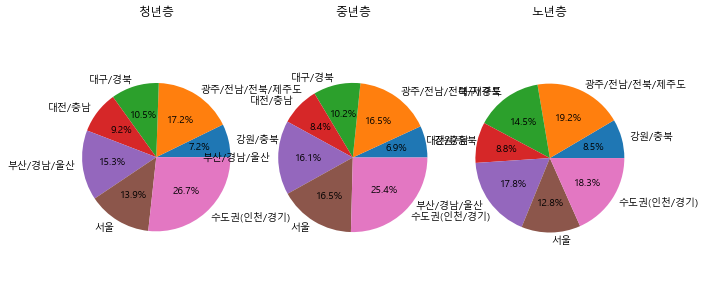

In [121]:
# pie chart 시각화
fig = plt.figure()
area01 = fig.add_subplot(1,3,1)
area02 = fig.add_subplot(1,3,2)
area03 = fig.add_subplot(1,3,3)

region_age_group_pivot['청년층'].plot.pie(ax=area01, autopct='%0.1f%%')
area01.title.set_text('청년층')
area01.set(ylabel="")
area01.axis('equal')

region_age_group_pivot['중년층'].plot.pie(ax=area02, autopct='%0.1f%%')
area02.title.set_text('중년층')
area02.set(ylabel="")
area02.axis('equal')

region_age_group_pivot['노년층'].plot.pie(ax=area03, autopct='%0.1f%%')
area03.title.set_text('노년층')
area03.set(ylabel="")
area03.axis('equal')


plt.show()